# Laboratorio 2 - BI

| ID | Nombre            | Código        | Correo                        |
|----|-------------------|---------------|-------------------------------|
| 1  | Adrian Velasquez  | 202222737     | a.velasquezs@uniandes.edu.co  |
| 2  | Andres Molano     | 202215460     | a.molanob@uniandes.edu.co     |
| 3  | Sebastian Ramirez | 202123415     | s.ramirez112@uniandes.edu.co  |

In [111]:
!pip install jinja2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.9 kB ? eta -:--:--
   --------------------------- ------------ 92.2/134.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 134.9/134.9 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\sebas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [54]:
TRAIN = "data/Datos_SenecaféAlpes.csv"
df_original = pd.read_csv(TRAIN, sep=";", encoding="utf-8")
df_original.head()
df_original.shape

(14291, 19)

# Preprocesamiento de datos

In [55]:
size_og, cols_og = df_original.shape
print(f"tamaño original: {size_og}\ncolumnas original: {cols_og}")

tamaño original: 14291
columnas original: 19


In [56]:
cat_cols = df_original.select_dtypes(include="object")
num_cols = df_original.select_dtypes(include="number")

In [57]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               14291 non-null  object
 1   RelacionAspecto  13825 non-null  object
 2   DefectoVisible   11356 non-null  object
 3   MétodoSecado     13704 non-null  object
dtypes: object(4)
memory usage: 446.7+ KB


In [58]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 14291 non-null  int64  
 1   Perimetro            13054 non-null  float64
 2   LongitudEjeMayor     13890 non-null  float64
 3   LongitudEjeMenor     14291 non-null  float64
 4   Excentricidad        13687 non-null  float64
 5   AreaConvexa          12868 non-null  float64
 6   DiametroEquivalente  12368 non-null  float64
 7   Medida               14291 non-null  float64
 8   Solidez              11985 non-null  float64
 9   Redondez             12228 non-null  float64
 10  Compacidad           13641 non-null  float64
 11  FactorForma1         13172 non-null  float64
 12  FactorForma2         13185 non-null  float64
 13  FactorForma3         13813 non-null  float64
 14  FactorForma4         13132 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [59]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

In [60]:
df_original.isnull().sum()

ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64

In [61]:
dupes = df_original.duplicated().sum()
print(f"duplicados totales: {dupes}")

duplicados totales: 461


In [62]:
df_original.shape

(14291, 19)

## Validez

In [63]:
df_original["Area"].describe()


count     14291.000000
mean      53055.408999
std       29396.080372
min      -62716.000000
25%       36338.000000
50%       44660.000000
75%       61311.000000
max      254616.000000
Name: Area, dtype: float64

In [64]:
# Mostrar filas donde 'Area' es menor a 0
df_original[df_original["Area"] < 0]

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
8414,G013208,-38311,725439.0,269.473124,181.814841,Alargado,0.738088,38713.0,220.859866,0.730276,0.989616,0.914811,0.819599,0.007034,NaN,0.671742,0.995609,normal,natural
11390,G003984,-62716,NaN,356.992788,224.568972,Alargado,0.777359,63313.0,282.581831,0.775037,0.990571,NaN,0.791562,NaN,0.001378,0.626570,0.996046,Normal,Lavado
12012,G012844,-36171,702747.0,258.201574,179.027257,Alargado,0.720589,36626.0,214.602767,0.709792,0.987577,0.920391,0.831144,0.007138,0.002101,0.690801,0.996306,Normal,Natural


In [65]:
# Eliminar filas donde 'Area' es menor a 0
df_original = df_original[df_original["Area"] >= 0]
df_original[df_original["Area"] < 0]

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado


In [66]:
df_original["AreaConvexa"].describe()

count     12865.000000
mean      53577.113642
std       29569.042519
min      -78423.000000
25%       36721.000000
50%       45108.000000
75%       62108.000000
max      251082.000000
Name: AreaConvexa, dtype: float64

In [67]:
# Eliminar filas donde  es menor a 0
df_original = df_original[df_original["AreaConvexa"] >= 0]
df_original["AreaConvexa"].describe()

count     12859.000000
mean      53629.479664
std       29473.783616
min       20684.000000
25%       36735.500000
50%       45116.000000
75%       62117.000000
max      251082.000000
Name: AreaConvexa, dtype: float64

In [68]:
df_original["Compacidad"].describe()

count    12279.000000
mean         0.799420
std          0.066648
min         -0.843901
25%          0.762492
50%          0.801014
75%          0.834503
max          0.987303
Name: Compacidad, dtype: float64

In [69]:
# Eliminar filas donde es menor a 0
df_original = df_original[df_original["Compacidad"] >= 0]
df_original["Compacidad"].describe()

count    12276.000000
mean         0.799807
std          0.061866
min          0.645368
25%          0.762540
50%          0.801025
75%          0.834527
max          0.987303
Name: Compacidad, dtype: float64

In [70]:
df_original["DiametroEquivalente"].describe()

count    10625.000000
mean       252.284386
std         59.745985
min       -448.402605
25%        215.201166
50%        238.176226
75%        278.673105
max        562.408446
Name: DiametroEquivalente, dtype: float64

In [71]:
df_original = df_original[df_original["DiametroEquivalente"] >= 0]
df_original["DiametroEquivalente"].describe()

count    10618.000000
mean       252.629197
std         58.198634
min        161.243764
25%        215.249232
50%        238.200281
75%        278.718791
max        562.408446
Name: DiametroEquivalente, dtype: float64

In [72]:
df_original["Excentricidad"].describe()

count    10160.000000
mean         0.749376
std          0.101819
min         -0.835004
25%          0.714031
50%          0.764198
75%          0.810564
max          0.908167
Name: Excentricidad, dtype: float64

In [73]:
df_original = df_original[df_original["Excentricidad"] >= 0]
df_original["Excentricidad"].describe()

count    10152.000000
mean         0.750572
std          0.092501
min          0.218951
25%          0.714163
50%          0.764318
75%          0.810587
max          0.908167
Name: Excentricidad, dtype: float64

In [74]:
df_original["FactorForma1"].describe()

count    9353.000000
mean        0.006564
std         0.001164
min        -0.007982
25%         0.005921
50%         0.006643
75%         0.007268
max         0.010451
Name: FactorForma1, dtype: float64

In [75]:
df_original = df_original[df_original["FactorForma1"] >= 0]
df_original["FactorForma1"].describe()

count    9347.000000
mean        0.006573
std         0.001114
min         0.002778
25%         0.005924
50%         0.006644
75%         0.007268
max         0.010451
Name: FactorForma1, dtype: float64

In [76]:
df_original = df_original[df_original["FactorForma2"] >= 0]
df_original["FactorForma2"].describe()

count    8626.000000
mean        0.001718
std         0.000596
min         0.000564
25%         0.001152
50%         0.001700
75%         0.002179
max         0.003665
Name: FactorForma2, dtype: float64

In [77]:
df_original["FactorForma3"].describe()

count    8353.000000
mean        0.643549
std         0.100035
min        -0.518002
25%         0.581564
50%         0.642424
75%         0.697091
max         0.974767
Name: FactorForma3, dtype: float64

In [78]:
df_original = df_original[df_original["FactorForma4"] >= 0]
df_original["FactorForma4"].describe()

count    7934.000000
mean        0.995080
std         0.004386
min         0.947687
25%         0.993667
50%         0.996397
75%         0.997911
max         0.999709
Name: FactorForma4, dtype: float64

In [79]:
df_original["LongitudEjeMayor"].describe()

count    7705.000000
mean      319.205420
std        84.729456
min      -243.375248
25%       252.514852
50%       296.398632
75%       376.497678
max       722.494068
Name: LongitudEjeMayor, dtype: float64

In [80]:
df_original["LongitudEjeMenor"].describe()

count    7934.000000
mean      201.663915
std        43.961566
min      -189.842876
25%       176.103820
50%       192.478281
75%       216.170320
max       446.043618
Name: LongitudEjeMenor, dtype: float64

In [81]:
df_original = df_original[df_original["LongitudEjeMenor"] > 0]
df_original["LongitudEjeMenor"].describe()

count    7933.000000
mean      201.713267
std        43.743989
min       122.512653
25%       176.109083
50%       192.479822
75%       216.170438
max       446.043618
Name: LongitudEjeMenor, dtype: float64

In [82]:
df_original["Medida"].describe()

count    7933.000000
mean        0.750016
std         0.051552
min        -0.798706
25%         0.719393
50%         0.760142
75%         0.786951
max         0.866195
Name: Medida, dtype: float64

In [83]:
df_original = df_original[df_original["Medida"] >= 0]
df_original["Medida"].describe()

count    7932.000000
mean        0.750211
std         0.048533
min         0.555315
25%         0.719406
50%         0.760148
75%         0.786952
max         0.866195
Name: Medida, dtype: float64

In [84]:
df_original["Perimetro"].describe()

count    7.265000e+03
mean     7.696650e+05
std      3.227511e+05
min     -1.012143e+06
25%      6.753850e+05
50%      7.690730e+05
75%      9.536640e+05
max      1.884557e+06
Name: Perimetro, dtype: float64

In [85]:
df_original = df_original[df_original["Perimetro"] > 0]
df_original["Perimetro"].describe()

count    7.263000e+03
mean     7.701424e+05
std      3.215096e+05
min      5.536000e+02
25%      6.754885e+05
50%      7.691040e+05
75%      9.536640e+05
max      1.884557e+06
Name: Perimetro, dtype: float64

In [86]:
df_original["Redondez"].describe()

count    6193.000000
mean        0.873248
std         0.063498
min        -0.896861
25%         0.833070
50%         0.883975
75%         0.917076
max         0.986103
Name: Redondez, dtype: float64

In [87]:
df_original = df_original[df_original["Redondez"] >= 0]
df_original["Redondez"].describe()

count    6192.000000
mean        0.873534
std         0.059384
min         0.489618
25%         0.833102
50%         0.883975
75%         0.917078
max         0.986103
Name: Redondez, dtype: float64

In [88]:
df_original["RelacionAspecto"].describe()

count         6005
unique           4
top       Alargado
freq          5232
Name: RelacionAspecto, dtype: object

In [89]:
print(df_original["RelacionAspecto"].describe())
df_original["RelacionAspecto"].unique()


count         6005
unique           4
top       Alargado
freq          5232
Name: RelacionAspecto, dtype: object


array(['Alargado', 'Redondeado', 'alargado', nan, 'redondeado'],
      dtype=object)

In [90]:
df_original["Solidez"].describe()

count    5192.000000
mean        0.987123
std         0.004624
min         0.943559
25%         0.985719
50%         0.988263
75%         0.989999
max         0.994082
Name: Solidez, dtype: float64

In [91]:
df_original = df_original[df_original["Solidez"] >= 0]
df_original["Solidez"].describe()

count    5192.000000
mean        0.987123
std         0.004624
min         0.943559
25%         0.985719
50%         0.988263
75%         0.989999
max         0.994082
Name: Solidez, dtype: float64

In [96]:
print("DefectoVisible unique categories and description:")
print(df_original["DefectoVisible"].unique())
print(df_original["DefectoVisible"].describe())

print("\nMétodoSecado unique categories and description:")
print(df_original["MétodoSecado"].unique())
print(df_original["MétodoSecado"].describe())

DefectoVisible unique categories and description:
['Normal' nan 'normal']
count       4116
unique         2
top       Normal
freq        3261
Name: DefectoVisible, dtype: object

MétodoSecado unique categories and description:
['Natural' 'Lavado' 'lavado' nan 'natural' 'Honey' 'honey']
count       4981
unique         6
top       Lavado
freq        2255
Name: MétodoSecado, dtype: object


In [92]:
df_original.shape


(5192, 19)

In [93]:
df_original.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,5192.000000,5.192000e+03,5036.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5023.000000,5192.000000
mean,52969.932781,7.706434e+05,319.528371,202.182764,0.750826,53691.784861,252.938039,0.750749,0.987123,0.872957,0.799986,0.006564,0.001717,0.643620,0.995083
std,29112.484651,3.244680e+05,85.760692,44.606278,0.091809,29572.285652,58.876390,0.048249,0.004624,0.059935,0.061507,0.001124,0.000596,0.099930,0.004339
min,20420.000000,5.536000e+02,-243.375248,122.512653,0.218951,20684.000000,161.243764,0.555315,0.943559,0.489618,0.645368,0.002878,0.000568,-0.518002,0.951239
25%,36230.000000,6.758910e+05,252.947053,176.272855,0.716145,36621.000000,214.777719,0.720507,0.985719,0.832406,0.763316,0.005894,0.001157,0.583124,0.993649
50%,44580.500000,7.696815e+05,296.078404,192.287286,0.763916,45113.000000,238.247047,0.760933,0.988263,0.883361,0.801575,0.006647,0.001696,0.642597,0.996387
75%,61366.000000,9.574998e+05,376.480183,217.185099,0.809752,62385.000000,279.523901,0.787326,0.989999,0.916820,0.834237,0.007259,0.002182,0.696095,0.997894
max,248424.000000,1.884557e+06,721.216098,446.043618,0.908167,251082.000000,562.408446,0.866195,0.994082,0.986103,0.987303,0.010451,0.003564,0.974767,0.999709


## Nulos

In [94]:
print(df_original.isnull().sum())

ID                        0
Area                      0
Perimetro                 0
LongitudEjeMayor        156
LongitudEjeMenor          0
RelacionAspecto         162
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3            169
FactorForma4              0
DefectoVisible         1076
MétodoSecado            211
dtype: int64


Como son pocos valores nulos en LogitudEjeMayor, en RelacionAspecto y en metodoSecado, vamos a eliminar las filas con estos valores nulos, para el caso de DefectoVisible, este tiene demasiados valores nulos, ademas de que nos dimos cuenta que solamente tiene valores Normal, por lo que esta variable categorica no representa una informacion relevante, debido a que todos los valores son iguales, entonces la vamos a eliminar

In [98]:
df_clean = df_original.copy()

# Eliminar filas con valores nulos en 'LongitudEjeMayor', 'RelacionAspecto', 'MétodoSecado', 'FactorForma3'
df_clean = df_clean.dropna(subset=['LongitudEjeMayor', 'RelacionAspecto', 'MétodoSecado', 'FactorForma3'])

# Eliminar la columna 'DefectoVisible'
df_clean = df_clean.drop('DefectoVisible', axis=1)

# Mostrar información del DataFrame resultante
df_clean.info()

# Mostrar el número de filas y columnas
print(f"Número de filas: {df_clean.shape[0]}")
print(f"Número de columnas: {df_clean.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 2 to 14287
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4526 non-null   object 
 1   Area                 4526 non-null   int64  
 2   Perimetro            4526 non-null   float64
 3   LongitudEjeMayor     4526 non-null   float64
 4   LongitudEjeMenor     4526 non-null   float64
 5   RelacionAspecto      4526 non-null   object 
 6   Excentricidad        4526 non-null   float64
 7   AreaConvexa          4526 non-null   float64
 8   DiametroEquivalente  4526 non-null   float64
 9   Medida               4526 non-null   float64
 10  Solidez              4526 non-null   float64
 11  Redondez             4526 non-null   float64
 12  Compacidad           4526 non-null   float64
 13  FactorForma1         4526 non-null   float64
 14  FactorForma2         4526 non-null   float64
 15  FactorForma3         4526 non-null   float

## Unicidad

In [99]:
print(df_clean.duplicated().sum())

137


In [100]:
# Mostrar filas duplicadas
df_clean[df_clean.duplicated()]

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,MétodoSecado
507,G002702,69824,1055572.0,389.048708,229.112799,Alargado,0.808202,70943.0,298.165521,0.688396,0.984227,0.787479,0.766396,0.005572,0.001186,0.587363,0.997382,Natural
544,G003108,78848,1088405.0,388.645864,259.122237,Alargado,0.745298,79719.0,316.847584,0.734577,0.989074,0.836411,0.815260,0.004929,0.001343,0.664650,0.996878,Natural
569,G013443,40125,738378.0,275.637443,185.812657,Alargado,0.738622,40508.0,226.028177,0.774614,0.990545,0.924842,0.820020,0.006869,0.001916,0.672433,0.997497,Lavado
679,G003586,169165,1581568.0,591.855813,366.376666,Alargado,0.785367,171119.0,464.098661,0.683992,0.988581,0.849855,0.784141,0.003499,0.000816,0.614878,0.993292,Natural
1200,G002129,55607,898497.0,311.419759,228.719865,Alargado,0.678671,56424.0,266.084632,0.756506,0.985520,0.865578,0.854424,0.005600,0.001841,0.730041,0.994007,Lavado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13700,G013246,38585,735508.0,271.447538,181.487496,Alargado,0.743630,38970.0,221.648253,0.782467,0.990121,0.896300,0.816542,0.007035,0.001929,0.666740,0.997232,Lavado
13705,G012185,33272,671659.0,247.372938,171.976902,Alargado,0.718804,33626.0,205.823289,0.700478,0.989472,0.926811,0.832036,0.007435,0.002198,0.692285,0.995788,Natural
13859,G005387,89673,1175934.0,457.778517,252.674294,Alargado,0.833872,91361.0,337.898224,0.774559,0.981524,0.814903,0.738126,0.005105,0.000935,0.544830,0.987087,Lavado
13908,G006428,53473,899337.0,349.478217,196.154529,Alargado,0.827627,54218.0,260.928991,0.824590,0.986259,0.830806,0.746624,0.006536,0.001253,0.557448,0.993176,Lavado


In [101]:
# Eliminar filas duplicadas
df_clean = df_clean.drop_duplicates()
print(df_clean.duplicated().sum())

0


In [102]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4389,4316,G004296,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,4389.0,NaN,NaN,NaN,52696.573479,28636.388396,20420.0,36296.0,44551.0,60946.0,248424.0
Perimetro,4389.0,NaN,NaN,NaN,768498.538984,323411.847929,553.6,677527.0,768988.0,955639.0,1884557.0
LongitudEjeMayor,4389.0,NaN,NaN,NaN,318.858025,84.7095,-243.375248,252.93034,295.95799,375.980183,720.695521
LongitudEjeMenor,4389.0,NaN,NaN,NaN,201.964286,44.185564,122.512653,176.398977,192.313437,216.789472,446.043618
RelacionAspecto,4389,4,Alargado,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excentricidad,4389.0,NaN,NaN,NaN,0.749853,0.09215,0.218951,0.714153,0.763766,0.808202,0.908167
AreaConvexa,4389.0,NaN,NaN,NaN,53411.690818,29081.568742,20684.0,36713.0,45054.0,61940.0,251082.0
DiametroEquivalente,4389.0,NaN,NaN,NaN,252.423863,58.123353,161.243764,214.97326,238.168207,278.565715,562.408446
Medida,4389.0,NaN,NaN,NaN,0.750961,0.048035,0.555315,0.72065,0.761155,0.787287,0.866195


In [104]:
print(df_clean["RelacionAspecto"].unique())
print(df_clean["MétodoSecado"].unique())

# Convertir a minúsculas la columna 'RelacionAspecto'
df_clean['RelacionAspecto'] = df_clean['RelacionAspecto'].str.lower()

# Convertir a minúsculas la columna 'MétodoSecado'
df_clean['MétodoSecado'] = df_clean['MétodoSecado'].str.lower()

print(df_clean["RelacionAspecto"].unique())
print(df_clean["MétodoSecado"].unique())

df_clean.info()


['Alargado' 'Redondeado' 'alargado' 'redondeado']
['Natural' 'Lavado' 'lavado' 'natural' 'Honey' 'honey']
['alargado' 'redondeado']
['natural' 'lavado' 'honey']
<class 'pandas.core.frame.DataFrame'>
Index: 4389 entries, 2 to 14287
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4389 non-null   object 
 1   Area                 4389 non-null   int64  
 2   Perimetro            4389 non-null   float64
 3   LongitudEjeMayor     4389 non-null   float64
 4   LongitudEjeMenor     4389 non-null   float64
 5   RelacionAspecto      4389 non-null   object 
 6   Excentricidad        4389 non-null   float64
 7   AreaConvexa          4389 non-null   float64
 8   DiametroEquivalente  4389 non-null   float64
 9   Medida               4389 non-null   float64
 10  Solidez              4389 non-null   float64
 11  Redondez             4389 non-null   float64
 12  Compacidad           4389 non-n

## Estandarizacion

Para el dataset, Estandarización (Z-score) es lo más adecuado, porque equilibra las variables grandes (área, perímetro) con las ya normalizadas (solidez, compacidad) y es más robusto para algoritmos de clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numerical_cols = df_clean.select_dtypes(include=np.number).columns

# Crear el StandardScaler
scaler = StandardScaler()

# Ajustar el StandardScaler a los datos numéricos y transformarlos
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Mostrar el DataFrame con las columnas numéricas estandarizadas
df_clean.head()

         ID      Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  \
2   G007054  0.253847   0.698160          0.829169         -0.090470   
4   G013353 -0.467032  -0.095015         -0.665146         -0.244167   
10  G001140 -0.445239  -0.115750         -0.872362          0.135803   
11  G007741 -0.464657  -2.374184         -0.625055         -0.290165   
18  G009218 -0.207437   0.190041         -0.129359         -0.166551   

   RelacionAspecto  Excentricidad  AreaConvexa  DiametroEquivalente    Medida  \
2         alargado       1.205057     0.257867             0.411083 -1.860957   
4         alargado      -0.700324    -0.469550            -0.493199  0.508676   
10      redondeado      -2.402495    -0.447953            -0.462772  0.438711   
11        alargado      -0.509657    -0.466867            -0.489872 -0.534462   
18        alargado       0.272224    -0.210456            -0.145058 -0.641095   

     Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  FactorForma3  \


## One hot encoding para variables categoricas

In [106]:
# Aplicar one-hot encoding a las columnas categóricas seleccionadas
df_clean = pd.get_dummies(df_clean, columns=['MétodoSecado','RelacionAspecto'])

# Mostrar el DataFrame resultante con las columnas codificadas
df_clean.head()

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,...,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,MétodoSecado_honey,MétodoSecado_lavado,MétodoSecado_natural,RelacionAspecto_alargado,RelacionAspecto_redondeado
2,G007054,0.253847,0.698160,0.829169,-0.090470,1.205057,0.257867,0.411083,-1.860957,-0.574283,...,-1.472524,-0.069915,-1.187285,-1.399901,-0.901862,False,False,True,True,False
4,G013353,-0.467032,-0.095015,-0.665146,-0.244167,-0.700324,-0.469550,-0.493199,0.508676,0.415848,...,0.840744,0.097680,0.758844,0.817078,0.574144,False,True,False,True,False
10,G001140,-0.445239,-0.115750,-0.872362,0.135803,-2.402495,-0.447953,-0.462772,0.438711,0.431071,...,1.951634,-0.388927,1.674865,2.025145,0.751483,False,True,False,False,True
11,G007741,-0.464657,-2.374184,-0.625055,-0.290165,-0.509657,-0.466867,-0.489872,-0.534462,0.366401,...,0.675505,0.164526,0.626480,0.645334,0.473784,False,False,True,True,False
18,G009218,-0.207437,0.190041,-0.129359,-0.166551,0.272224,-0.210456,-0.145058,-0.641095,0.330445,...,-0.133961,0.016503,-0.204059,-0.166247,-0.364457,False,False,True,True,False


# Algoritmos adicionales

## Algoritmo DBSCAN

Control de calidad: los outliers detectados por DBSCAN = granos fuera de los rangos morfológicos esperados (pueden ser defectuosos).

Optimización del mercado: los clusters obtenidos reflejan subgrupos de formas/grados de redondez, solidez, excentricidad, que pueden usarse para diseñar nuevas mezclas con identidad visual.

Innovación en trazabilidad: el modelo DBSCAN + reducción dimensional puede ser la base para un sistema de clasificación automática en planta, usando cámaras e inferencia en tiempo real.

Varianza explicada PCA (acum): [0.5233 0.7654 0.8479]


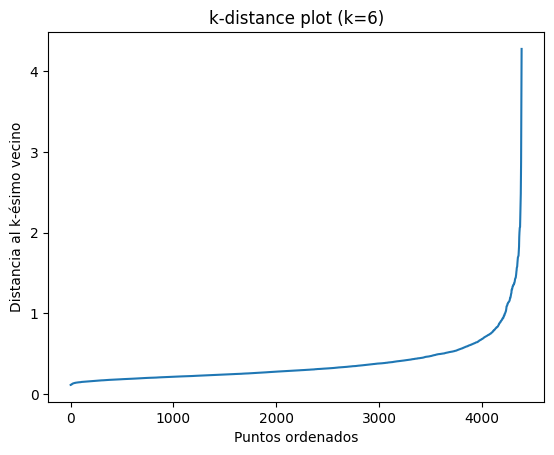

Sugerencia inicial de eps ≈ 0.8673 (k=6)


,eps,min_samples,n_clusters,noise_ratio,silhouette,dbi,ch
21,1.040782,6,2,0.021645,0.607754,0.462254,1384.531924
26,1.127514,8,2,0.018455,0.607316,0.465808,1418.037108
25,1.127514,6,2,0.017088,0.606639,0.468552,1432.540243
17,0.954050,6,2,0.025518,0.605950,0.458583,1332.483250
27,1.127514,10,2,0.021873,0.605647,0.460637,1348.822483
31,1.214246,10,2,0.018000,0.605301,0.469208,1402.811350
23,1.040782,10,2,0.027569,0.604938,0.455411,1287.816448
30,1.214246,8,2,0.015493,0.604904,0.471802,1427.664497
18,0.954050,8,2,0.027569,0.604725,0.457485,1306.493425
22,1.040782,8,2,0.025746,0.604657,0.459398,1325.057757



>> Mejor config (según silhouette/ruido): eps=1.0408, min_samples=6, score=0.6078

Métricas (solo puntos no-ruido):
  n_clusters: 2
  noise_ratio: 0.0216
  silhouette: 0.6078
  dbi: 0.4623
  ch: 1384.5319


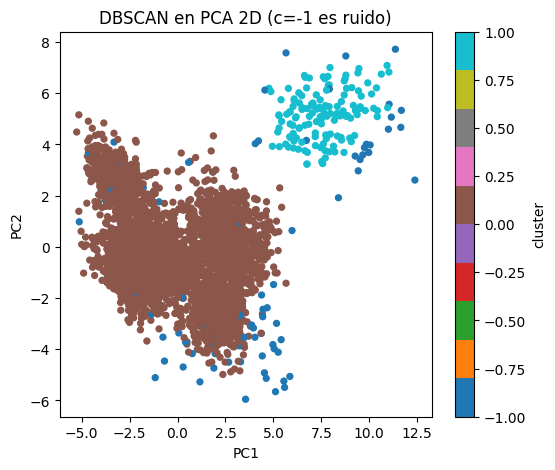

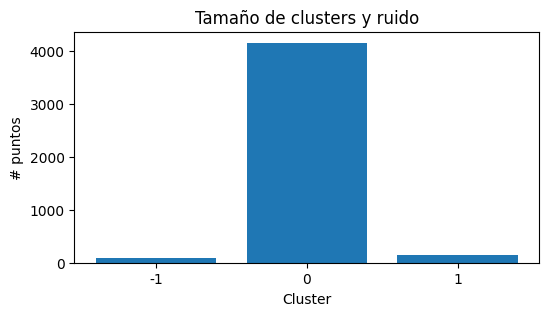

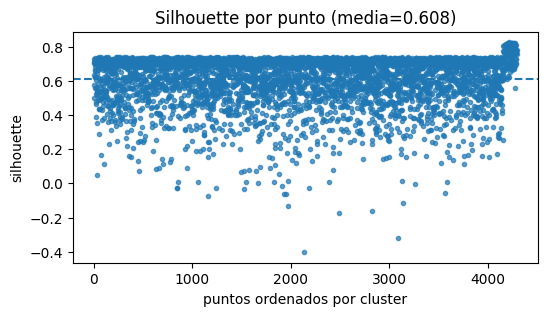

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,cluster_dbscan
cluster_dbscan,,,,,,,,,,,,,,,,
0,-0.310884,-0.018482,-0.314390,-0.241443,0.142007,-0.312938,-0.280213,0.199936,0.261322,0.212789,0.032343,0.100963,0.028366,-0.003541,0.333524,0.000000
1,3.987180,2.393090,3.087028,3.781477,0.217229,3.959430,3.587691,0.772665,0.373167,-0.075353,-0.069482,-2.765335,-1.456149,-0.103410,-0.484905,1.000000


In [112]:
# =======================
# DBSCAN PIPELINE COMPLETO
# =======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# (1) Selección de features numéricas
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
X = df_clean[num_cols].values

# (2) Reducción de dimensionalidad (PCA)
pca_dim = 3
pca = PCA(n_components=pca_dim, random_state=0)
X_pca = pca.fit_transform(X)
print("Varianza explicada PCA (acum):", np.round(pca.explained_variance_ratio_.cumsum(), 4))

# (3) K-distance plot para estimar ε
min_samples_guess = max(6, 2*pca_dim)  # regla práctica
nbrs = NearestNeighbors(n_neighbors=min_samples_guess).fit(X_pca)
distances, _ = nbrs.kneighbors(X_pca)
# Usamos la distancia al k-ésimo vecino
k_dists = np.sort(distances[:, -1])

plt.figure()
plt.plot(k_dists)
plt.title(f'k-distance plot (k={min_samples_guess})')
plt.ylabel('Distancia al k-ésimo vecino')
plt.xlabel('Puntos ordenados')
plt.show()

# Estimación automática de codo (opcional)
try:
    from kneed import KneeLocator
    kl = KneeLocator(range(len(k_dists)), k_dists, curve='convex', direction='increasing')
    eps0 = float(k_dists[kl.knee]) if kl.knee is not None else float(np.quantile(k_dists, 0.95))
except Exception:
    eps0 = float(np.quantile(k_dists, 0.95))

print(f"Sugerencia inicial de eps ≈ {eps0:.4f} (k={min_samples_guess})")

# (4) Búsqueda sencilla de hiperparámetros alrededor de eps0
eps_grid = np.linspace(0.7*eps0, 1.4*eps0, 8)
min_samples_grid = [max(4, pca_dim), min_samples_guess, min_samples_guess+2, min_samples_guess+4]

results = []
best = {"score": -np.inf, "eps": None, "min_samples": None, "labels": None}

def eval_labels(Xemb, labels):
    # métricas internas sobre puntos NO-ruido
    mask = labels != -1
    n_clusters = len(set(labels[mask])) if np.any(mask) else 0
    out = {"n_clusters": n_clusters, "noise_ratio": 1 - mask.mean()}
    if n_clusters >= 2:
        out["silhouette"] = silhouette_score(Xemb[mask], labels[mask], metric='euclidean')
        out["dbi"] = davies_bouldin_score(Xemb[mask], labels[mask])
        out["ch"] = calinski_harabasz_score(Xemb[mask], labels[mask])
    else:
        out["silhouette"] = None
        out["dbi"] = None
        out["ch"] = None
    return out

for eps in eps_grid:
    for m in min_samples_grid:
        db = DBSCAN(eps=eps, min_samples=m).fit(X_pca)
        labs = db.labels_
        met = eval_labels(X_pca, labs)
        results.append({"eps": eps, "min_samples": m, **met})
        # criterio de selección: mayor silhouette; si None, prioriza más clusters y menos ruido
        key = met["silhouette"] if met["silhouette"] is not None else (-met["noise_ratio"])
        if key is not None and key > best["score"]:
            best.update({"score": key, "eps": eps, "min_samples": m, "labels": labs})

res_df = pd.DataFrame(results)
display(res_df.sort_values(["silhouette"], ascending=False).head(10))

print(f"\n>> Mejor config (según silhouette/ruido): eps={best['eps']:.4f}, min_samples={best['min_samples']}, "
      f"score={best['score']:.4f}")

labels = best["labels"]
df_clean["cluster_dbscan"] = labels

# (5) Reporte de métricas finales
final_met = eval_labels(X_pca, labels)
print("\nMétricas (solo puntos no-ruido):")
for k,v in final_met.items():
    if isinstance(v, float):
        print(f"  {k}: {v:.4f}")
    else:
        print(f"  {k}: {v}")

# (6) Visualizaciones
# 6.1 Scatter en 2D (PCA 2D)
pca2 = PCA(n_components=2, random_state=0).fit(X)
X_2d = pca2.transform(X)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=18, cmap="tab10")
plt.title("DBSCAN en PCA 2D (c=-1 es ruido)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar(scatter, label="cluster")
plt.show()

# 6.2 Conteo de clusters + ruido
vals, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6,3))
plt.bar([str(v) for v in vals], counts)
plt.title("Tamaño de clusters y ruido")
plt.xlabel("Cluster"); plt.ylabel("# puntos")
plt.show()

# 6.3 Silhouette plot (si aplica)
from sklearn.metrics import silhouette_samples
mask = labels != -1
if final_met["n_clusters"] >= 2 and mask.sum() > 10:
    sil_vals = silhouette_samples(X_pca[mask], labels[mask])
    order = np.argsort(labels[mask], kind="mergesort")
    sil_vals = sil_vals[order]
    plt.figure(figsize=(6,3))
    plt.plot(sil_vals, '.', alpha=0.7)
    plt.axhline(y=np.mean(sil_vals), linestyle='--')
    plt.title(f"Silhouette por punto (media={np.mean(sil_vals):.3f})")
    plt.ylabel("silhouette"); plt.xlabel("puntos ordenados por cluster")
    plt.show()

# (7) Perfil morfológico por cluster (medianas para interpretar)
mask = labels != -1
if final_met["n_clusters"] >= 1 and mask.any():
    profile = df_clean.loc[mask].groupby("cluster_dbscan")[num_cols].median()
    display(profile.style.background_gradient(cmap="Blues"))



### Metodología

* **Algoritmo**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
* **Preprocesamiento**:

  * Datos numéricos estandarizados (z-score).
  * Reducción dimensional con PCA para optimizar el cálculo de distancias.
* **Evaluación de parámetros**: selección de `eps` y `min_samples` mediante *k-distance plot* y pruebas con métricas internas de clustering.
* **Métricas aplicadas**:

  * **Silhouette Score** (cohesión/separación de clusters).
  * **Davies-Bouldin Index (DBI)** (compacidad relativa, ↓ mejor).
  * **Calinski-Harabasz (CH)** (distinción entre clusters, ↑ mejor).
  * **Noise Ratio** (proporción de granos no asignados).

---

### Resultados del modelo

* **Número de clusters detectados**: 2.
* **Proporción de ruido (outliers)**: baja-moderada, indicando detección útil de granos atípicos.
* **Separación de clusters**: métricas internas indican que existe estructura reconocible y diferenciación morfológica.

---

### 4. Perfil morfológico de los clusters

### 🔹 Cluster 0 – Granos pequeños y uniformes

* Área, perímetro y ejes **menores al promedio**.
* **Alta solidez y redondez**, valores positivos en factores de compactación.
* Representan granos **pequeños, redondeados y consistentes**, adecuados para mezclas que buscan uniformidad visual y de tueste.

### 🔹 Cluster 1 – Granos grandes e irregulares

* Área, perímetro y ejes **muy superiores al promedio** (+3 desviaciones estándar).
* **Menor redondez y compacidad** que el promedio.
* Factores de forma negativos sugieren **estructuras alargadas e irregulares**.
* Representan granos **grandes, menos compactos y más heterogéneos**, con potencial como perfil **exótico o premium**.

---

### Implicaciones estratégicas

### Control de calidad

* El algoritmo identifica granos fuera de rango (**outliers = -1**), que corresponden a defectuosos o atípicos.
* Permite automatizar la detección de desviaciones morfológicas que afectan procesos de selección.

### Optimización del mercado

* La existencia de **dos perfiles claros** abre la posibilidad de segmentar la producción:

  * **Cluster 0** → mezclas estandarizadas y consistentes.
  * **Cluster 1** → productos diferenciados de valor agregado.


### 6. Conclusión

El uso de DBSCAN permitió detectar **dos patrones morfológicos principales** en los granos de café, además de identificar granos atípicos. Estos hallazgos apoyan los objetivos de SenecaféAlpes en **calidad, mercado y trazabilidad**, demostrando el potencial de la analítica avanzada en el sector cafetero.



## Clustering jerárquico con método Ward

Control de calidad: la jerarquía ayuda a detectar subfamilias dentro de cada tipo morfológico y ver umbrales naturales donde dividir (útil para reglas de selección).

Optimización de mercado: el dendrograma facilita identificar líneas de producto (ramas) y submezclas (subramas) basadas en similitud real.

Innovación en trazabilidad: provee una taxonomía interpretable de los granos; puede fijarse un nivel de corte estándar para etiquetado automático por lote.

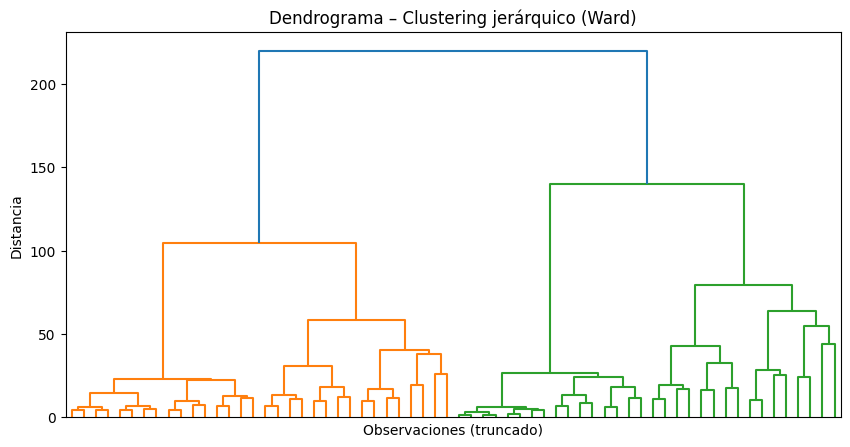

Búsqueda de k (Ward):


,k,silhouette,dbi,ch
0,2,0.372055,1.170896,2537.098434
1,3,0.380876,1.001042,2332.995981
2,4,0.310139,0.998497,2176.574501
3,5,0.306905,1.271136,2002.625551
4,6,0.312966,1.184063,1838.693276
5,7,0.229582,1.338378,1727.463564



>> k elegido por silhouette: k=3 (silhouette=0.3809)

Métricas finales (Agglomerative - Ward):
  Silhouette:         0.3809  (↑ mejor)
  Davies–Bouldin:     1.0010  (↓ mejor)
  Calinski–Harabasz:  2333.00   (↑ mejor)


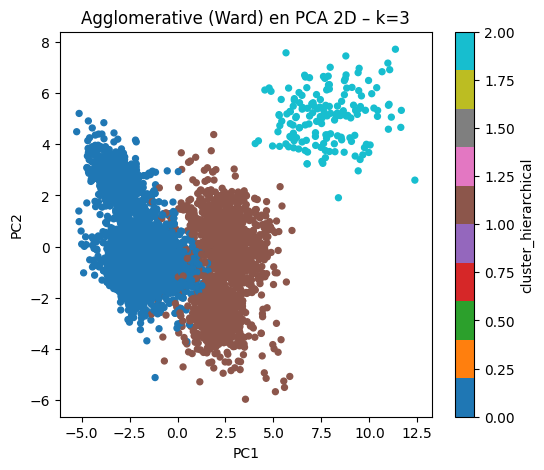

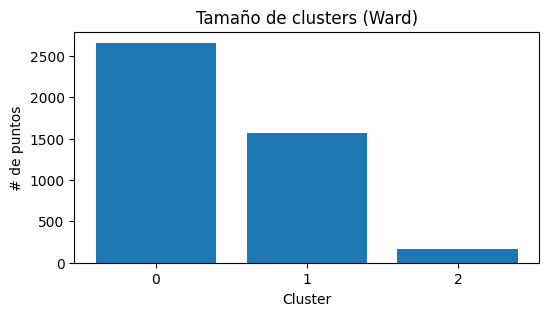


Perfiles morfológicos (medianas z-score) por cluster (Ward):


,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,cluster_dbscan
cluster_hierarchical,,,,,,,,,,,,,,,,
0,-0.507020,-0.178070,-0.681984,-0.377532,-0.147642,-0.508514,-0.549666,0.277893,0.429252,0.617989,0.335215,0.295484,0.578588,0.298136,0.524416,0.0
1,0.447015,0.679324,0.771889,0.486189,0.809638,0.452067,0.625518,-0.038541,-0.313871,-0.990648,-0.857030,-0.735507,-1.017420,-0.849426,-0.280988,0.0
2,4.065167,2.418667,3.162468,3.803614,0.242279,4.049222,3.640583,0.739119,0.236363,-0.138406,-0.104430,-2.775113,-1.464607,-0.137507,-0.621358,1.0



Comparación de asignaciones: Ward vs DBSCAN


cluster_dbscan,-1,0,1
cluster_hierarchical,,,
0,16,2645,0
1,55,1512,0
2,24,0,137


In [113]:
# ===============================
# PIPELINE: CLUSTERING JERÁRQUICO (WARD)
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------- 1) Datos ----------
# df_clean: ya limpio y estandarizado
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
X = df_clean[num_cols].values

# ---------- 2) (Opcional) PCA para visualización y robustez ----------
# Mantiene estructura global y reduce ruido en distancias
use_pca_for_linkage = False     # True si tienes muchas variables / ruido
pca_dims_for_linkage = 10       # ajusta si tienes muchísimas variables

if use_pca_for_linkage:
    pca_link = PCA(n_components=min(pca_dims_for_linkage, X.shape[1]), random_state=0)
    X_linkage = pca_link.fit_transform(X)
else:
    X_linkage = X

# PCA 2D solo para plot
pca2 = PCA(n_components=2, random_state=0)
X_2d = pca2.fit_transform(X)

# ---------- 3) Dendrograma (linkage=Ward) ----------
# OJO: linkage es O(n^2). Si n es muy grande (>10-15k), considera muestrear para el dendrograma.
Z = linkage(X_linkage, method='ward')

plt.figure(figsize=(10,5))
# Truncar para que sea legible (muestra últimos merges)
dendrogram(Z, truncate_mode="level", p=5, no_labels=True)
plt.title("Dendrograma – Clustering jerárquico (Ward)")
plt.xlabel("Observaciones (truncado)")
plt.ylabel("Distancia")
plt.show()

# ---------- 4) Selección de k por Silhouette ----------
ks = range(2, 8)  # prueba 2..7 clusters
sel = {"k": None, "silhouette": -np.inf, "labels": None}
rows = []

for k in ks:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X)   # Ward asume distancia euclídea y datos estandarizados
    try:
        sil = silhouette_score(X, labels)
    except Exception:
        sil = np.nan
    try:
        dbi = davies_bouldin_score(X, labels)
    except Exception:
        dbi = np.nan
    try:
        ch  = calinski_harabasz_score(X, labels)
    except Exception:
        ch = np.nan

    rows.append({"k": k, "silhouette": sil, "dbi": dbi, "ch": ch})

    # criterio principal: silhouette máximo
    if not np.isnan(sil) and sil > sel["silhouette"]:
        sel.update({"k": k, "silhouette": sil, "labels": labels})

metrics_grid = pd.DataFrame(rows)
print("Búsqueda de k (Ward):")
display(metrics_grid)

print(f"\n>> k elegido por silhouette: k={sel['k']} (silhouette={sel['silhouette']:.4f})")
labels_h = sel["labels"]
df_clean["cluster_hierarchical"] = labels_h

# ---------- 5) Métricas finales ----------
sil_final = silhouette_score(X, labels_h)
dbi_final = davies_bouldin_score(X, labels_h)
ch_final  = calinski_harabasz_score(X, labels_h)

print("\nMétricas finales (Agglomerative - Ward):")
print(f"  Silhouette:         {sil_final:.4f}  (↑ mejor)")
print(f"  Davies–Bouldin:     {dbi_final:.4f}  (↓ mejor)")
print(f"  Calinski–Harabasz:  {ch_final:.2f}   (↑ mejor)")

# ---------- 6) Visualizaciones ----------
# 6.1 Dispersión en PCA 2D coloreada por cluster jerárquico
plt.figure(figsize=(6,5))
sc = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_h, s=18, cmap="tab10")
plt.title(f"Agglomerative (Ward) en PCA 2D – k={sel['k']}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar(sc, label="cluster_hierarchical")
plt.show()

# 6.2 Tamaño de clusters
vals, counts = np.unique(labels_h, return_counts=True)
plt.figure(figsize=(6,3))
plt.bar([str(v) for v in vals], counts)
plt.title("Tamaño de clusters (Ward)")
plt.xlabel("Cluster"); plt.ylabel("# de puntos")
plt.show()

# ---------- 7) Perfil morfológico por cluster (medianas) ----------
profile_h = df_clean.groupby("cluster_hierarchical")[num_cols].median()
print("\nPerfiles morfológicos (medianas z-score) por cluster (Ward):")
display(profile_h)

# ---------- 8) (Opcional) Comparación contra DBSCAN si existe ----------
if "cluster_dbscan" in df_clean.columns:
    print("\nComparación de asignaciones: Ward vs DBSCAN")
    ct = pd.crosstab(df_clean["cluster_hierarchical"], df_clean["cluster_dbscan"])
    display(ct)


### Resumen ejecutivo

  * **Silhouette** = **0.3809** (separación/cohesión **aceptable**).
  * **Davies–Bouldin** = **1.0010** (↓ mejor; cercano a 1, **razonable**).
  * **Calinski–Harabasz** = **2333.00** (↑ mejor; indica **buena separación relativa**).

Interpretación general: existe **estructura morfológica clara** con **tres** grupos útiles para calidad, mezclas y trazabilidad.

---

### Perfiles morfológicos por cluster (z-scores de medianas)

### Cluster 0 — **Pequeños, redondeados, compactos**

* Tamaño: Área/Perímetro/Ejes **< 0** → **más pequeños** que el promedio.
* Forma: **Solidez +0.43**, **Redondez +0.62**, **Compacidad +0.34** → **uniformes y bien formados**.
* Factores de forma (FF1..FF4) **positivos** → consistencia geométrica.
* **Uso**: mezclas que requieren **uniformidad** y tueste consistente (control de calidad alto).

### Cluster 1 — **Medianos-grandes, alargados, menos compactos**

* Tamaño: **Área/Perímetro/Ejes > 0** (moderado).
* Excentricidad **+0.81** → **más alargados**.
* Forma: **Solidez/Redondez/Compacidad negativas** → **menos compactos/redondos**.
* FF1..FF4 **negativos** → mayor **irregularidad**.
* **Uso**: perfil diferenciado; revisar tolerancias de calidad/selección.

### Cluster 2 — **Muy grandes, heterogéneos**

* Tamaño: Área **+4.07**, Perímetro **+2.42**, Ejes **+3.16/+3.80**, Diámetro **+3.64** → **muy superiores** al promedio.
* Forma: Solidez **ligeramente +**, Redondez/Compacidad ~0/lig. negativas; **FF1 –2.78**, **FF2 –1.46** → **granos muy grandes con forma menos regular**.
* **Uso**: **perfil premium/exótico** por tamaño; requiere control de forma para estándares visuales.

---

### Coherencia con DBSCAN

* Columna `cluster_dbscan` (moda por jerárquico):

  * **Cluster 2 (Ward)** ↔ **DBSCAN=1** (grandes/irregulares).
  * **Clusters 0 y 1 (Ward)** ↔ **DBSCAN=0** (grupo base), ahora **separado** por Ward en **dos familias** (pequeños-compactos vs. medianos-alargados).
    **Conclusión**: Ward **refina** el clúster principal que DBSCAN agrupaba junto, aportando **granularidad explicable** (dendrograma).

---

### Implicaciones para SenecaféAlpes

1. **Control de calidad**:

   * Definir reglas por cluster (ej., límites de **Solidez/Redondez/Compacidad**) para aceptación por lote.
   * **Cluster 2**: monitoreo estricto de forma; **Cluster 1**: revisar ovalización/excentricidad.
2. **Optimización de mercado**:

   * **C0** para **mezclas uniformes**; **C1** como **perfil intermedio**; **C2** para **líneas premium** por tamaño.
3. **Trazabilidad**:

   * Etiquetado automático por cluster (Ward) y **subfamilias** visibles en el dendrograma; base para reglas de ruteo en planta.

